<a href="https://colab.research.google.com/github/AMP4323/BTP/blob/main/Power_Law_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/AMP4323/BTP/main/Bitcoin%20Historical%20Data%20-%20Investing.com%20India%20(1).csv'

df = pd.read_csv(url, header=None, names=['Date',	'Price',	'Open',	'High',	'Low',	'Volume',	'ChangePercentage'])
df =df.drop(0)
df

,Date,Price,Open,High,Low,Volume,ChangePercentage
1,"Nov 28, 2021","54,389.3","54,758.0","54,924.1","53,735.6",37.72K,-0.69%
2,"Nov 27, 2021","54,765.9","53,747.2","55,280.3","53,654.3",40.71K,1.93%
3,"Nov 26, 2021","53,730.9","58,937.3","59,151.1","53,533.5",104.03K,-8.83%
4,"Nov 25, 2021","58,935.1","57,167.1","59,387.3","57,029.8",56.79K,3.08%
5,"Nov 24, 2021","57,171.7","57,559.4","57,697.4","55,910.6",56.68K,-0.70%
...,...,...,...,...,...,...,...
4148,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
4149,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
4150,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
4151,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%


In [ ]:
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].astype('float64')
df['Open'] = df['Open'].str.replace(',', '')
df['Open'] = df['Open'].astype('float64')
df['High'] = df['High'].str.replace(',', '')
df['High'] = df['High'].astype('float64')
df['Low'] = df['Low'].str.replace(',', '')
df['Low'] = df['Low'].astype('float64')
df

,Date,Price,Open,High,Low,Volume,ChangePercentage
1,"Nov 28, 2021",54389.3,54758.0,54924.1,53735.6,37.72K,-0.69%
2,"Nov 27, 2021",54765.9,53747.2,55280.3,53654.3,40.71K,1.93%
3,"Nov 26, 2021",53730.9,58937.3,59151.1,53533.5,104.03K,-8.83%
4,"Nov 25, 2021",58935.1,57167.1,59387.3,57029.8,56.79K,3.08%
5,"Nov 24, 2021",57171.7,57559.4,57697.4,55910.6,56.68K,-0.70%
...,...,...,...,...,...,...,...
4148,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
4149,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
4150,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
4151,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%


In [ ]:
df = df.assign(Date=pd.to_datetime(df['Date']))
df

,Date,Price,Open,High,Low,Volume,ChangePercentage
1,2021-11-28,54389.3,54758.0,54924.1,53735.6,37.72K,-0.69%
2,2021-11-27,54765.9,53747.2,55280.3,53654.3,40.71K,1.93%
3,2021-11-26,53730.9,58937.3,59151.1,53533.5,104.03K,-8.83%
4,2021-11-25,58935.1,57167.1,59387.3,57029.8,56.79K,3.08%
5,2021-11-24,57171.7,57559.4,57697.4,55910.6,56.68K,-0.70%
...,...,...,...,...,...,...,...
4148,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%
4149,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
4150,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
4151,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%


In [ ]:
df = df.drop(columns=["Open", "High", "Low", "Volume", "ChangePercentage"])

In [ ]:
df

,Date,Price
1,2021-11-28,54389.3
2,2021-11-27,54765.9
3,2021-11-26,53730.9
4,2021-11-25,58935.1
5,2021-11-24,57171.7
...,...,...
4148,2010-07-22,0.1
4149,2010-07-21,0.1
4150,2010-07-20,0.1
4151,2010-07-19,0.1


In [ ]:
df =  df.set_index(['Date'])

In [ ]:
df

,Price
Date,
2021-11-28,54389.3
2021-11-27,54765.9
2021-11-26,53730.9
2021-11-25,58935.1
2021-11-24,57171.7
...,...
2010-07-22,0.1
2010-07-21,0.1
2010-07-20,0.1


In [ ]:
import numpy as np
# shift moves dates back by 1
df_change = df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
df_change.head()

,Price
Date,
2021-11-28,NaN
2021-11-27,0.006900
2021-11-26,-0.019079
2021-11-25,0.092449
2021-11-24,-0.030378


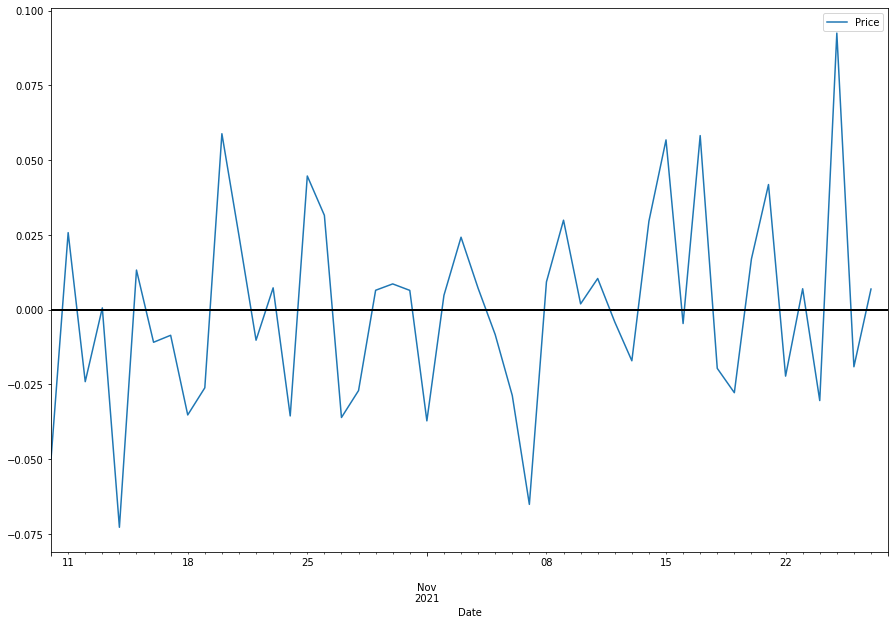

In [ ]:
df_change[:50].plot(figsize=(15, 10)).axhline(color='black', linewidth=2)

In [ ]:
import numpy as np
from scipy import stats


def freedman_diaconis(data, returnas="width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = np.asarray(data, dtype=np.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale="raw", nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = (int)((datrng / bw) + 1)
    return result

BINS FREEDMAN RULE

In [ ]:
Bin = freedman_diaconis(data=df['Price'], returnas="bins")

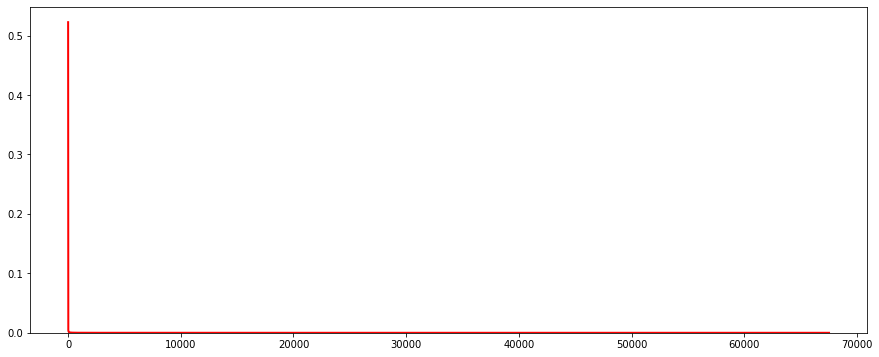

In [ ]:
from scipy import stats
from scipy.stats import lognorm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))
values = df['Price']
shape, loc, scale = stats.lognorm.fit(values) 
x = np.linspace(values.min(), values.max(), len(values))
pdf = stats.lognorm.pdf(x, shape, loc=loc, scale=scale) 
label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)
ax.hist(values, bins= Bin, density=True)
ax.plot(x, pdf, 'r-', lw=2, label=label)
# ax.legend(loc='best')

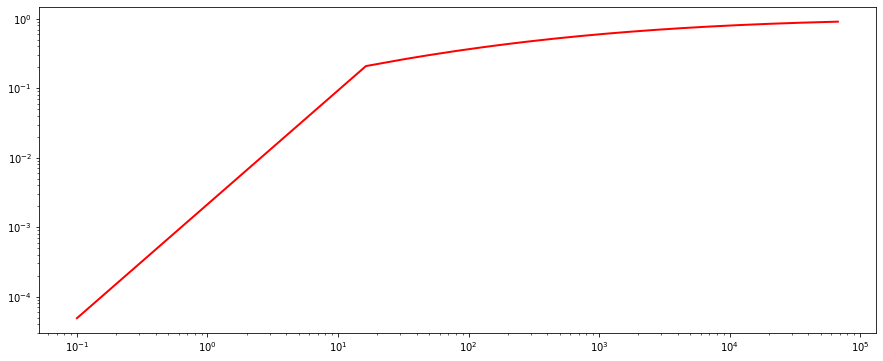

In [ ]:
from scipy import stats
from scipy.stats import lognorm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))
values = df['Price']
shape, loc, scale = stats.lognorm.fit(values) 
x = np.linspace(values.min(), values.max(), len(values))
pdf = stats.lognorm.cdf(x, shape, loc=loc, scale=scale) 
label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)
# ax.hist(values, bins= Bin, density=True)
ax.plot(x, pdf, 'r-', lw=2, label=label)
# ax.legend(loc='best')
ax.set_xscale('log')
ax.set_yscale('log')

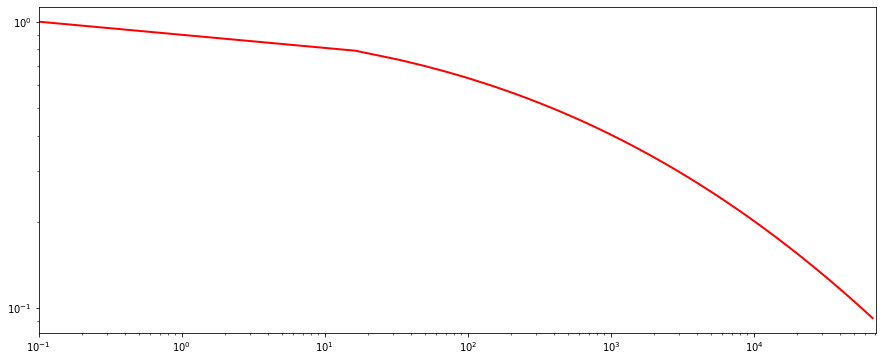

In [ ]:
from scipy import stats
from scipy.stats import lognorm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))
values = df['Price']
shape, loc, scale = stats.lognorm.fit(values) 
x = np.linspace(values.min(), values.max(), len(values))
pdf = 1- (stats.lognorm.cdf(x, shape, loc=loc, scale=scale) )
label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)
# ax.hist(values, bins=Bin, density=True)
ax.plot(x, pdf, 'r-', lw=2, label=label)
# ax.legend(loc='best')
ax.set_xlim(x.min())
ax.set_xscale('log')
ax.set_yscale('log')

In [ ]:
Bin2 = freedman_diaconis(data=df_change['Price'][1:], returnas="bins")

PDF

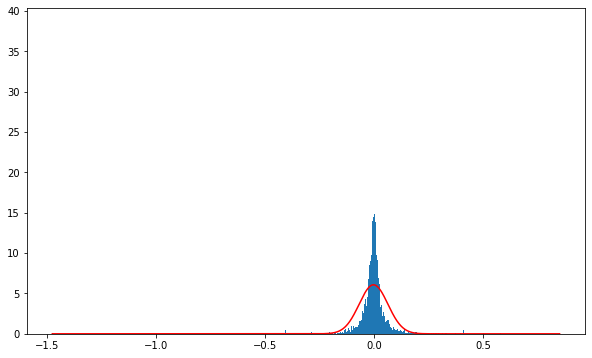

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

values = df_change['Price'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))
# x = values
shape, loc, scale = stats.lognorm.fit(values)
param_density = stats.lognorm.pdf(x,shape,  loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=Bin2, density=True)
ax.plot(x, param_density, 'r-', label=label)
# ax.legend(loc='best')
# ax.set_xscale('log')
# ax.set_yscale('log')

Loglogreturn CDF

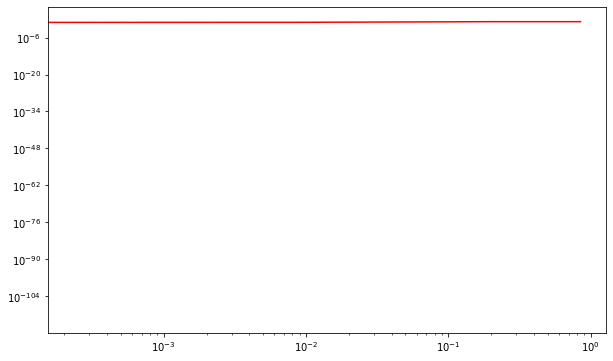

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

values = df_change['Price'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))
shape, loc, scale = stats.lognorm.fit(values)
param_density = stats.lognorm.cdf(x, shape,  loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)
fig, ax = plt.subplots(figsize=(10, 6))
# ax.hist(values, bins=Bin2, density=True)
ax.plot(x, param_density, 'r-', label=label)
# ax.legend(loc='best')
ax.set_xscale('log')
ax.set_yscale('log')

Loglogreturn CCDF

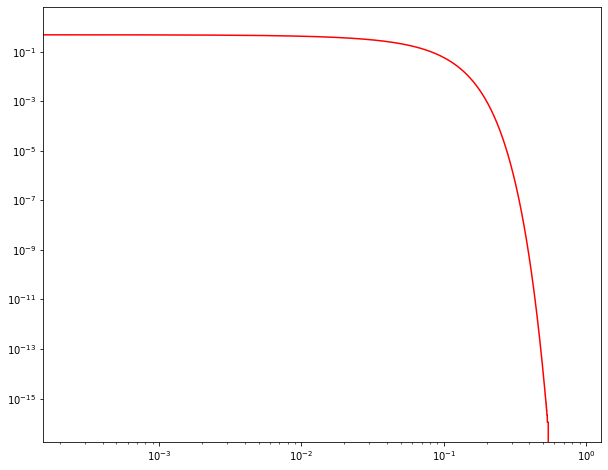

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

values = df_change['Price'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))
shape, loc, scale = stats.lognorm.fit(values)
param_density = 1 - (stats.lognorm.cdf(x,shape,  loc=loc, scale=scale))
label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)
fig, ax = plt.subplots(figsize=(10, 8))
# ax.hist(values, bins=Bin2, density=True)
plt.plot(x, param_density, 'r-', label=label)
# ax.legend(loc='best')
plt.xscale('log')
plt.yscale('log')

In [ ]:
# import pandas as pd
# import numpy as np
# import scipy.stats as stats
# import matplotlib.pyplot as plt
# from scipy.stats import powerlaw

# values = df_change['Price'][1:]  # skip first NA value
# x = np.linspace(values.min(), values.max(), len(values))
# shape, loc, scale = stats.powerlaw.fit(values)
# param_density = 1-(stats.powerlaw.cdf(x,shape,  loc=loc, scale=scale))
# label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)
# fig, ax = plt.subplots(figsize=(10, 8))
# # ax.hist(values, bins=Bin2, density=True)
# plt.plot(x, param_density,'r-', label=label)
# # ax.legend(loc='best')
# plt.xscale('log')
# plt.yscale('log')

In [ ]:
!pip install powerlaw

In [ ]:
# import powerlaw
# # data can be list or numpy array
# values = df_change['Price'][1:] # skip first NA value
# values = abs(values)
# # x = np.linspace(values.min(), values.max(), len(values))
# fit = powerlaw.Fit(values, xmin=None, xmax=None, estimate_discrete=False)
# # print(fit.power_law.alpha)
# # print(fit.power_law.xmin)
# # R, p = fit.distribution_compare('power_law', 'lognormal')
# fit.plot_ccdf(original_data=True)
# # fit.D/

In [ ]:
values = df_change['Price'][1:] # skip first NA value
values = abs(values)
print(values)

Date
2021-11-27    0.006900
2021-11-26    0.019079
2021-11-25    0.092449
2021-11-24    0.030378
2021-11-23    0.006998
                ...   
2010-07-22    0.000000
2010-07-21    0.000000
2010-07-20    0.000000
2010-07-19    0.000000
2010-07-18    0.000000
Name: Price, Length: 4151, dtype: float64


In [ ]:
import powerlaw
# data can be list or numpy array
values = df_change['Price'][1:] # skip first NA value
values = abs(values)
# x = np.linspace(values.min(), values.max(), len(values))
fit = powerlaw.Fit(values, xmin=None, xmax=None, estimate_discrete=False)
print(fit.power_law.alpha)
print(fit.power_law.xmin)
# R, p = fit.distribution_compare('power_law', 'lognormal')
# fit.plot_ccdf(original_data=True)
# fit.D/

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


3.013783126543936
0.08425756498514758


In [ ]:
values = df_change['Price'][1:]

In [ ]:
df_change['Price'][1]

0.006900294155233411

In [ ]:
values

Date
2021-11-27    0.006900
2021-11-26   -0.019079
2021-11-25    0.092449
2021-11-24   -0.030378
2021-11-23    0.006998
                ...   
2010-07-22    0.000000
2010-07-21    0.000000
2010-07-20    0.000000
2010-07-19    0.000000
2010-07-18    0.000000
Name: Price, Length: 4151, dtype: float64

In [ ]:
A=[]
B=[]
# values[1]
for i in values:
  if(i>=0.00):
    A.append(i)
  else:
    B.append(-i)

In [ ]:
A

In [ ]:
B

In [ ]:
import powerlaw
# data can be list or numpy array
values = A # skip first NA value
# values = abs(values)
# x = np.linspace(values.min(), values.max(), len(values))
fit = powerlaw.Fit(values, xmin=None, xmax=None, estimate_discrete=False)
print(fit.power_law.alpha)
# print(fit.power_law.xmin)
# R, p = fit.distribution_compare('power_law', 'lognormal')
# fit.plot_ccdf(original_data=True)
# fit.D/

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
2.9649901589101444


In [ ]:
import powerlaw
# data can be list or numpy array
values = B # skip first NA value

# x = np.linspace(values.min(), values.max(), len(values))
fit = powerlaw.Fit(values, xmin=None, xmax=None, estimate_discrete=False)
print(fit.power_law.alpha)
# print(fit.power_law.xmin)
# R, p = fit.distribution_compare('power_law', 'lognormal')
# fit.plot_ccdf(original_data=True)
# fit.D/

Calculating best minimal value for power law fit
3.090961783192781
